In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [36]:
# Read the dataset

df = pd.read_csv('height-weight.csv')

In [37]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

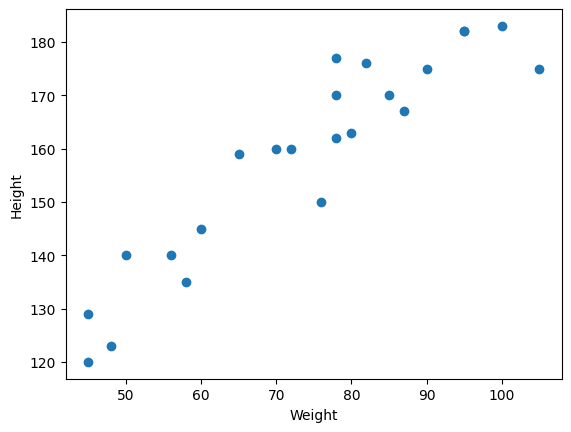

In [38]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

#### **Step 1**  ->  Divide our dataset into independent and dependent features

In [39]:
X = df['Weight'] # independent features
y = df['Height'] # dependent feature

In [40]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

#### **Step 2** ->  Train test split of the dataset


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
X.shape

(23,)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18,), (5,), (18,), (5,))

#### **Step 3** ->  Standardize the dataset Train independent data

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train.head()

12    105
1      58
13    100
5      78
2      48
Name: Weight, dtype: int64

In [ ]:
# Convert X_train from a 1-D Series into a 2-D DataFrame,
# then learn the mean & standard deviation and scale the training data
X_train = scaler.fit_transform(X_train.to_frame())

# Convert X_test from a 1-D Series into a 2-D DataFrame,
# then scale it using the same parameters learned from X_train
X_test = scaler.transform(X_test.to_frame())

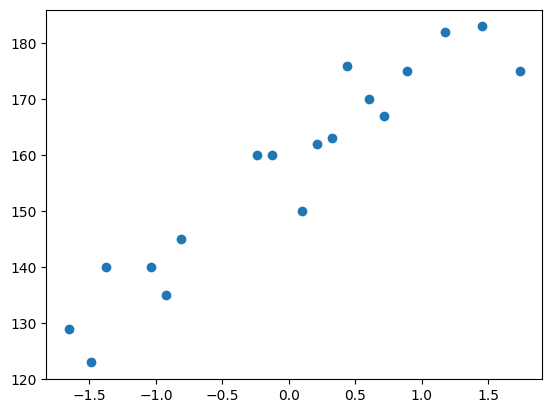

In [50]:
plt.scatter(X_train ,y_train)

#### **Step 4** -> Train the model using Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [54]:
regressor = LinearRegression()

In [55]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
print("The slope or coefficient of weight is ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept:  157.5


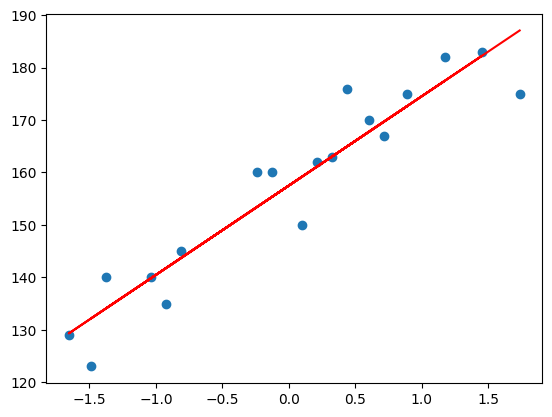

In [60]:
plt.scatter(X_train, y_train)

# h theta(x) = theta(0) + theta(1) * x(1)
# theta(0) = 157.5 , theta(1) = 17.03

plt.plot(X_train, regressor.predict(X_train,), 'r')

#### Prediction of train data

1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)


#### Prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [62]:
y_pred_test = regressor.predict(X_test)

In [63]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

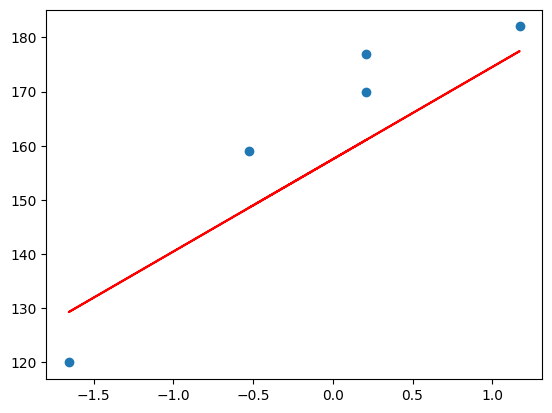

In [65]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

### **Performance Metrics**

MSE, MAE, RMSE

R square and adjusted R square

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


### **R square**

**R^2 = 1 - SSR / SST**

R^2 = coefficient of determination  
SSR = sum of squares of residuals  
SST = total sum of squares

In [69]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)

In [70]:
score

0.776986986042344

### Adjusted R square

**Adjusted R2 = 1 - [(1- R2) * (n - 1) / (n - k - 1)]**

where:  
R2: The R2 of the model  
n: The number of observations  
k: The number of predictor variables

In [72]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


0.7026493147231252

In [73]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
# new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\My_Programs\Python\Python\PYTHON1\venv1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [78]:
scaled_weight[0]

array([0.32350772])

In [80]:
print("The height prediction for weight 80 kg is:",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is: [163.01076266]


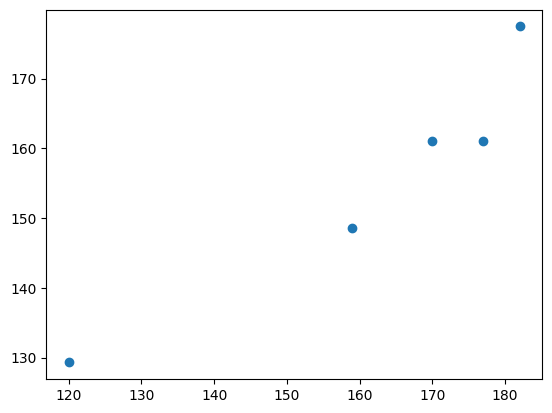

In [81]:
# Assumptions
# plot a scatter plot for prediction

plt.scatter(y_test, y_pred_test)

In [82]:
## Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

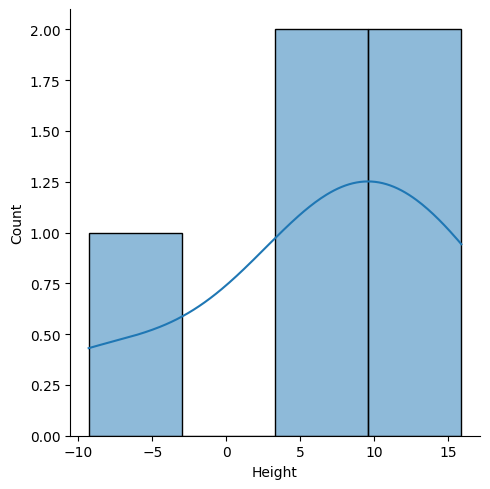

In [83]:
# Plot this residuals
import seaborn as sns
sns.displot(residuals, kde = True)

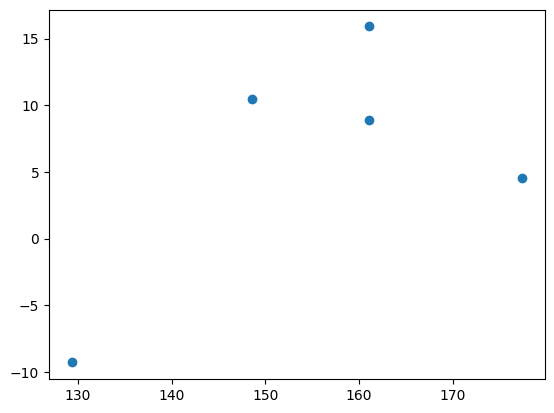

In [84]:
# Scatter plot with respect to prediction and residuals

plt.scatter(y_pred_test, residuals)